# 날씨 데이터셋 val_accuratcy 0.9이상 달성

### <b>데이터 세트 다운로드</b>

* 딥러닝 모델 학습 과정에서 필요한 데이터 세트를 불러온다.

In [1]:
!git clone https://github.com/ndb796/weather_dataset
%cd weather_dataset

c:\Users\qq\Downloads\0909 실습 자료\0909 실습 자료\weather_dataset


Cloning into 'weather_dataset'...
Updating files:  91% (1032/1126)
Updating files:  92% (1036/1126)
Updating files:  93% (1048/1126)
Updating files:  94% (1059/1126)
Updating files:  95% (1070/1126)
Updating files:  96% (1081/1126)
Updating files:  97% (1093/1126)
Updating files:  98% (1104/1126)
Updating files:  99% (1115/1126)
Updating files: 100% (1126/1126)
Updating files: 100% (1126/1126), done.
C:\Users\qq\AppData\Roaming\Python\Python310\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


### <b>라이브러리 불러오기(Load Libraries)</b>

* 딥러닝 모델 학습 과정에서 필요한 라이브러리를 불러온다.

In [2]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

import numpy as np
import matplotlib.pyplot as plt

### 하이퍼 파라미터 정의


In [3]:
# 필요한 하이퍼 파라미터 추가 정의
INPUT_SIZE = 128
BATCH_SIZE = 46
EPOCH = 10
FILTER_SIZE = 3
NUM_FILTERS = 32
MAXPOOL_SIZE = 2

### 데이터 세트 불러오기

In [4]:
# 폴더 형식으로 구분된 이미지 불러오기
train_generator = ImageDataGenerator(
    rescale = 1/255.,
    validation_split = 0.2,
    horizontal_flip = True,
    vertical_flip = True
)
test_generator = ImageDataGenerator(rescale=1/255.)

train_data = train_generator.flow_from_directory(
    directory = 'train/',
    shuffle = True,
    target_size = (INPUT_SIZE, INPUT_SIZE),
    class_mode = 'categorical',
    batch_size = BATCH_SIZE,
    subset = 'training'
)

val_data = train_generator.flow_from_directory(
    directory = 'train/',
    shuffle = True,
    target_size = (INPUT_SIZE, INPUT_SIZE),
    class_mode = 'categorical',
    batch_size = BATCH_SIZE,
    subset = 'validation'
)

test_data = test_generator.flow_from_directory(
    directory = 'test/',
    shuffle = True,
    target_size = (INPUT_SIZE, INPUT_SIZE),
    class_mode = 'categorical',
    batch_size = BATCH_SIZE
)

Found 676 images belonging to 4 classes.
Found 168 images belonging to 4 classes.
Found 281 images belonging to 4 classes.


### 데이터 시각화

['Sunrise', 'Shine', 'Rain', 'Sunrise']


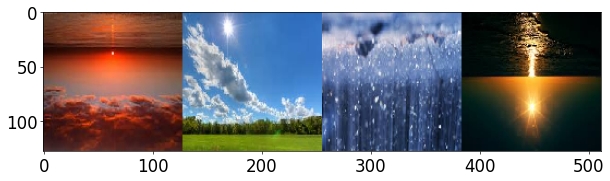

In [6]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 60
plt.rcParams.update({'font.size': 20})

class_names = {
  0: "Cloudy",
  1: "Rain",
  2: "Shine",
  3: "Sunrise"
}

images, targets = next(train_data)

print([class_names[x] for x in np.argmax(targets[:4], axis=1)])
plt.imshow(np.concatenate((images[0], images[1], images[2], images[3]), axis=1))
plt.show()

### <b>딥러닝 모델 학습(Training)</b>

* 사전 학습된(pre-trained) 모델(model)을 이용하여 가지고 있는 데이터 세트에 대한 학습이 가능하다.
  * <b>include_top</b>: 네트워크 뒤에 FC (fully-connected) 레이어를 포함하는지 여부
  * <b>weights</b>: None 혹은 "imagenet"
  * 네트워크의 마지막에 FC 레이어를 적용하여 클래스 개수를 일치시킨다.

In [9]:
# 모델 구성하기
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential([
    Conv2D(NUM_FILTERS, (FILTER_SIZE, FILTER_SIZE), activation='relu', input_shape=(INPUT_SIZE, INPUT_SIZE, 3)),
    MaxPooling2D((MAXPOOL_SIZE, MAXPOOL_SIZE)),
    Dropout(0.2),

    Flatten(),
    Dense(32, activation='relu'),

    Dense(4, activation='softmax')
])

model.summary()

c:\Users\qq\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 127008)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │     4,064,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,065,316 (15.51 MB)

 Trainable params: 4,065,316 (15.51 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습(validation_data=validaion_set)
history = model.fit(train_data, epochs=EPOCH, validation_data=val_data)

Epoch 1/10


c:\Users\qq\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 495ms/step - accuracy: 0.3979 - loss: 1.9456 - val_accuracy: 0.5238 - val_loss: 0.6467
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 211ms/step - accuracy: 0.5908 - loss: 0.4871 - val_accuracy: 0.6548 - val_loss: 0.3496
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 205ms/step - accuracy: 0.7275 - loss: 0.3112 - val_accuracy: 0.7262 - val_loss: 0.3784
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 196ms/step - accuracy: 0.7945 - loss: 0.2474 - val_accuracy: 0.7440 - val_loss: 0.3123
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 191ms/step - accuracy: 0.8186 - loss: 0.2143 - val_accuracy: 0.7500 - val_loss: 0.2998
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 205ms/step - accuracy: 0.8483 - loss: 0.2001 - val_accuracy: 0.7679 - val_loss: 0.3012
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 206ms/step - accuracy: 0.8669 - loss: 0.1842 - val_accuracy: 0.6964 - val_loss: 0.3318
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 209ms/step - accuracy: 0.8594 - loss: 0.1876 - val_accuracy: 0.7798 - val

### 분류 보고서 출력

### <b>학습 결과 확인하기</b>

* 학습 결과를 시각화하여 정상적으로 모델이 학습되었는지 확인한다.

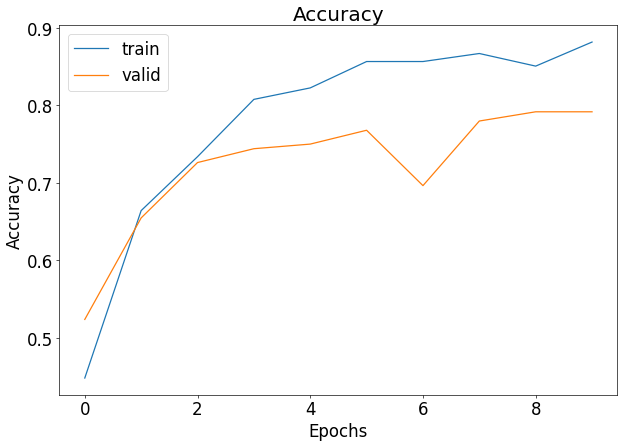

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Accuracy')
plt.legend(['train', 'valid'])
plt.show()

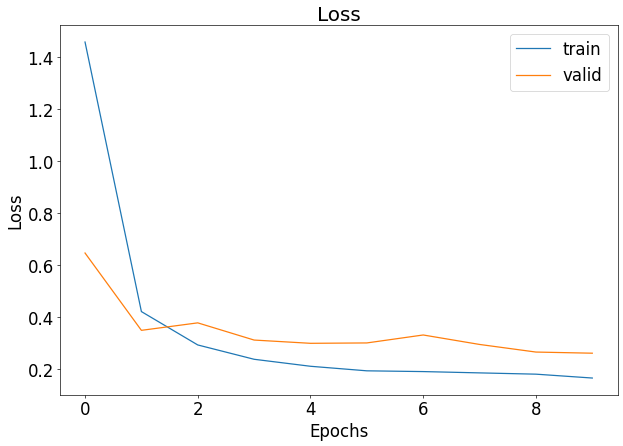

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Loss')
plt.legend(['train', 'valid'])
plt.show()

In [14]:
# 학습된 모델 테스트
test_history = model.evaluate(test_data)
test_loss, test_accuracy = test_history

print(f"Test loss: {test_loss:.8f}")
print(f"Test accuracy: {test_accuracy * 100.:.2f}%")

2/7 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9022 - loss: 0.1696 

c:\Users\qq\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 307ms/step - accuracy: 0.9168 - loss: 0.1498
Test loss: 0.14230521
Test accuracy: 92.17%
